# Homework - 2
***
**Name**: Christina Cleveland 
Worked with: Maggie Jacoby
***

This assignment is due on Canvas by **5pm on Friday October 5th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Boosting - Extra Credit [5-points]
***

In this problem, we slightly modify the AdaBoost algorithm to better explore some properties of the algorithm. Specifically, we no longer normalize the weights on the training examples after each iteration. The modified algorithm, which is set to run for $T$ iterations, is shown in Algorithm I.

Note that in the modified version, the weights associated with the training examples are no longer guaranteed to sum to one after each iteration (and therefore can not be viewed as a "distribution"), but the algorithm is still valid. Let us denote the sum of weights at the start of iteration $t$ by $Z_t = \sum_{i=1}^{n}w_t^{(t)}$. At the start of the first iteration of boosting, $Z_1 = n$. Let us now investigate the behavior of $Z_t$, as a function of t

![image](fig-1.png)

**A:** At the $i^{th}$ iteration, we found a weak classifier that achieves a weighted training error $\epsilon_t$. Show that the choice, $\alpha_t = \frac{1}{2}\log\frac{1 - \epsilon_t}{\epsilon_t}$ is the optimal in the sense that it minimizes $Z_{t+1}$

*Hint: Look at $Z_{t+1}$ as function of $\alpha$ and find the value of $\alpha$ for which the function achieves the maximum. You may also find the following notational shorthand useful:

$$W_t = \sum_{i=1}^{n}w_i^{(t)}(1 - \delta(y_i, h_t(x_i)))$$
$$W_c = \sum_{i=1}^{n}w_i^{(t)}(\delta(y_i, h_t(x_i)))$$

where $W_c$ is the total weight of the points classified correctly by $h_t$ and $W_t$ is the total weight of the misclassified points. $\delta(y, h_t(x)) = 1$ whenever the label predicted by $h_t$ is correct and zero otherwise. The weights here are those available at the start of iteration $t$

**Solution Part A:**

$$Z_{t+1} = \sum_{i=1}^{n}w_i^{(t+1)}$$

From the algorithm above, the update to the weights is:

$$w_i^{(t+1)} = w_i^{(t)} \exp{(-y_i\alpha_t h_t(x_i))}$$

If the prediction at i is correct then the above equation simlifies to:

$$w_i^{(t+1)} = w_i^{(t)} \exp{(-\alpha_t)}$$

Else, if the prediction at i is incorrect the equation simplifies to:

$$w_i^{(t+1)} = w_i^{(t)} \exp{(\alpha_t)}$$

We can substitute these in the first equation above, using $W_c$ and $W_t$, so that $Z_{t+1}$ is a function of $\alpha_t$:

$$Z_{t+1}(\alpha_t) = W_t\exp{(\alpha_t)} + W_c\exp{(-\alpha_t)} $$

To find a minimum for $Z_{t+1}$, will find where first derivative, w.r.t $\alpha_i$, is 0:

$$\frac{\delta Z_{t+1}(\alpha_t)}{\delta\alpha_i} = W_t\exp{(\alpha_t)} - W_c\exp{(-\alpha_t)} = 0 $$

Rearranging this to solve for $\alpha_t$, we get:

$$ \exp{(2\alpha_t)} = \frac{W_c }{W_t} $$


$$\alpha_t = \frac12 \log \frac{W_c }{W_t}$$

From the equation for the weighted training error, given in the algorithm, can solve for $W_t$ and $W_c$ in terms of $\epsilon_t$:

For $W_t$:
$$ \epsilon_t = \frac 1 {Z_t} W_t$$
$$ W_t =Z_t \epsilon_t $$

For $W_c$:
$$\epsilon_t = \frac 1 {Z_t}(Z_t - W_c)$$
$$\epsilon_t = 1 - \frac {W_c} {Z_t}$$
$$ W_c =Z_t (1 - \epsilon_t) $$

So, substituting these in to the function for $\alpha_t$:

$$\alpha_t = \frac12 \log \frac{Z_t (1 - \epsilon_t) }{Z_t \epsilon_t }$$

$$\alpha_t = \frac12 \log \frac{1 - \epsilon_t}{\epsilon_t }$$

which shows that the choice of $\alpha_t$ is optimal since it minimizes $Z_t$

**B:** Show that the sum of weights $Z_t$ is monotonically decreasing as a function of $t$.

Will show that $Z_t$ is monotonically decreasing by showing that $Z_{t+1} / Z_t < 1$

From part a:
$$Z_{t+1} = W_t\exp{(\alpha_t)} + W_c\exp{(-\alpha_t)} $$

$$Z_{t} = W_t + W_c$$

Substituting in $\alpha_t$:

$$Z_{t+1} =  W_t\exp{(\frac12 \log \frac{W_c }{W_t})} + W_c\exp{(-\frac12 \log \frac{W_c }{W_t})}$$

$$Z_{t+1}  =  W_t(\frac{W_c }{W_t})^{1/2} + W_c(\frac{W_t}{W_c})^{1/2} $$

$$Z_{t+1}  =  W_t(\frac{W_c }{W_t})^{1/2} + W_c(\frac{W_t}{W_c})^{1/2}$$

$$Z_{t+1}  =  2({W_t}{W_c})^{1/2}$$

Substitute in for $W_t, W_c$:

$$Z_{t+1}  =  2Z_t({\epsilon_t}(1-\epsilon_t))^{1/2}$$

$$\frac{Z_{t+1}}{Z_t}  =  2({-\epsilon_t^2}+\epsilon_t)^{1/2}$$

For worst case scenario, where $\epsilon_t = \frac12$:

$$\frac{Z_{t+1}}{Z_t}  = 2(\frac12) = 1$$

However, by definition, $\epsilon_t < \frac12$ and as $\epsilon_t$ decreases so does $2({-\epsilon_t^2}+\epsilon_t)^{1/2}$, so $\frac{Z_{t+1}}{Z_t} < 1$ which shows that ${Z_{t+1}}<{Z_t}$

## Training Data
***
Please do not change this class

In [4]:
import numpy as np
from sklearn.base import clone

In [5]:
class ThreesAndEights:
    """
    Class to store MNIST data
    """

    def __init__(self, location):

        import pickle, gzip

        # Load the dataset
        f = gzip.open(location, 'rb')

        # Split the data set 
#         X_train, y_train, X_valid, y_valid = pickle.load(f)
        train_set, valid_set, test_set = pickle.load(f)
    
        X_train, y_train = train_set
        X_valid, y_valid = valid_set

        # Extract only 3's and 8's for training set 
        self.X_train = X_train[np.logical_or( y_train==3, y_train == 8), :]
        self.y_train = y_train[np.logical_or( y_train==3, y_train == 8)]
        self.y_train = np.array([1 if y == 8 else -1 for y in self.y_train])
        
        # Shuffle the training data 
        shuff = np.arange(self.X_train.shape[0])
        np.random.shuffle(shuff)
        self.X_train = self.X_train[shuff,:]
        self.y_train = self.y_train[shuff]

        # Extract only 3's and 8's for validation set 
        self.X_valid = X_valid[np.logical_or( y_valid==3, y_valid == 8), :]
        self.y_valid = y_valid[np.logical_or( y_valid==3, y_valid == 8)]
        self.y_valid = np.array([1 if y == 8 else -1 for y in self.y_valid])
        
        f.close()

In [6]:
data = ThreesAndEights("data/mnist.pklz")

Feel free to explore this data and get comfortable with it before proceeding further.

## Bagging
Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

Given a standard training set $D$ of size n, bagging generates $N$ new training sets $D_i$, roughly each of size n * ratio, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_i$ The $N$ models are fitted using the above $N$ bootstraped samples and combined by averaging the output (for regression) or voting (for classification). 

-Source [Wiki](https://en.wikipedia.org/wiki/Bootstrap_aggregating)

## Implementing Bagging [5-points]
***

We've given you a skeleton of the class `BaggingClassifier` below which will train a classifier based on the decision trees as implemented by sklearn. Your tasks are as follows, please approach step by step to understand the code flow:
* Implement `bootstrap` method which takes in two parameters (`X_train, y_train`) and returns a bootstrapped training set ($D_i$)
* Implement `fit` method which takes in two parameters (`X_train, y_train`) and trains `N` number of base models on different bootstrap samples. You should call `bootstrap` method to get bootstrapped training data for each of your base model
* Implement `voting` method which takes the predictions from learner trained on bootstrapped data points `y_hats` and returns final prediction as per majority rule. In case of ties, return either of the class randomly.
* Implement `predict` method which takes in multiple data points and returns final prediction for each one of those. Please use the `voting` method to reach consensus on final prediction.

In [391]:
from sklearn.tree import DecisionTreeClassifier

class BaggingClassifier:
    def __init__(self, ratio = 0.20, N = 20, base=DecisionTreeClassifier(max_depth=4)):
        """
        Create a new BaggingClassifier
        
        Args:
            base (BaseEstimator, optional): Sklearn implementation of decision tree
            ratio: ratio of number of data points in subsampled data to the actual training data
            N: number of base estimator in the ensemble
        
        Attributes:
            base (estimator): Sklearn implementation of decision tree
            N: Number of decision trees
            learners: List of models trained on bootstrapped data sample
        """
        
        assert ratio <= 1.0, "Cannot have ratio greater than one"
        self.base = base
        self.ratio = ratio
        self.N = N
        self.learners = []
        
    def fit(self, X_train, y_train):
        """
        Train Bagging Ensemble Classifier on data
        
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        from sklearn.base import clone
        for i in range(self.N): 
            h = clone(self.base)
            boots = self.boostrap(X_train, y_train)
            self.learners.append(h.fit(boots[0], boots[1]))
        
        #TODO: Implement functionality to fit models on the bootstrapped samples
        # cloning sklearn models:
        # from sklearn.base import clone
        # h = clone(self.base)
        
        
    def boostrap(self, X_train, y_train):
        """
        Args:
            n (int): total size of the training data
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        n = self.ratio*len(X_train)
        boot_Ind = np.random.choice(np.arange(len(X_train)), size = int(n), replace = True)
        return X_train[boot_Ind], y_train[boot_Ind]
    
    def predict(self, X):
        #print('BAGPRED')
        """
        BaggingClassifier prediction for data points in X
        
        Args:
            X (ndarray): [n_samples x n_features] ndarray of data 
            
        Returns:
            yhat (ndarray): [n_samples] ndarray of predicted labels {-1,1}
        """
        yhat = []
        for x in X:
            y_hat = [learner.predict([x]) for learner in self.learners]
            yhat.append(self.voting(y_hat))
        return yhat
        #TODO: Using the individual classifiers trained predict the final prediction using voting mechanism
    
    def voting(self, y_hats):
        """
        Args:
            y_hats (ndarray): [N] ndarray of data
        Returns:
            y_final : int, final prediction of the 
        """
        result = np.sum(y_hats)
        if result == 0:
            return np.random.choice([-1,1], size = 1)[0]
        return np.sign(result)
        #TODO: Implement majority voting scheme and incase of ties return random label

## BaggingClassifier for Handwritten Digit Recognition [5-points]
***

After you've successfully completed `BaggingClassifier` find the optimal values of `ratio`, `N` and `depth` using k-fold cross validation. You are allowed to use sklearn library to split your training data in folds. Use the data from `ThreesAndEights` class initialized variable `data`. 

Justify why those values are optimal.

Report accuracy on the validation data using the optimal parameter values.

In [420]:
from sklearn.model_selection import KFold
num_folds = 5
folds = KFold(num_folds,True,1)
k_fold_sets = folds.split(data.X_train)
results_ratios = []
print("next loop")
for rat in list(np.arange(0.1, 1, 0.1)):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        test_bag = BaggingClassifier(ratio = rat)
        test_bag.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(test_bag.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
    average_acc = average_acc/num_folds
    results_ratios.append([rat,1-average_acc])
print("next loop")
results_numT = []
for NN in np.arange(1,16,2):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        test_bag = BaggingClassifier(N = NN)
        test_bag.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(test_bag.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
    average_acc = average_acc/num_folds
    results_numT.append([NN,1-average_acc])
results_depths = []
print("next loop")
for dep in np.arange(1,21,2):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        test_bag = BaggingClassifier(base=DecisionTreeClassifier(max_depth=dep))
        test_bag.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(test_bag.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
        #print((rat,NN,dep),average_E)
    average_acc = average_acc/num_folds
    results_depths.append([dep,1-average_acc])

next loop
next loop
next loop


Results from 5-fold Cross Validation


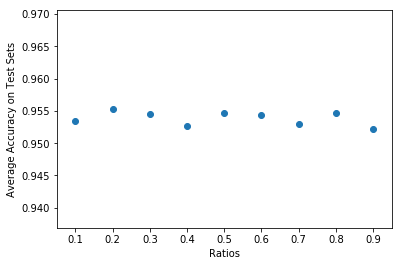

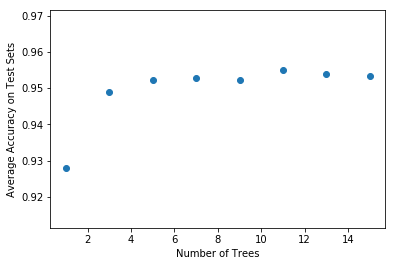

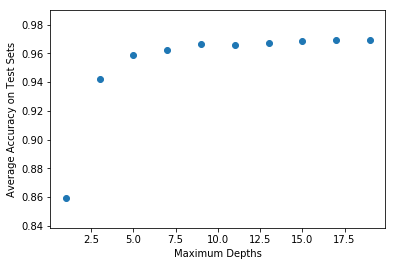

In [421]:
print('Results from 5-fold Cross Validation')
plt.scatter([x[0] for x in results_ratios], [x[1] for x in results_ratios])
plt.xlabel('Ratios')
plt.ylabel("Average Accuracy on Test Sets")
plt.show();
plt.scatter([x[0] for x in results_numT], [x[1] for x in results_numT])
plt.xlabel('Number of Trees')
plt.ylabel("Average Accuracy on Test Sets")
plt.show();
plt.scatter([x[0] for x in results_depths], [x[1] for x in results_depths])
plt.xlabel('Maximum Depths')
plt.ylabel("Average Accuracy on Test Sets")
plt.show();

Based on the observed accuracies, the best results are seen when each parameter is at it's upper limit (roughly), however using these values is inefficient since most of the accuracy gains are seen for smaller values of the parameters. For the depth and number of trees, you reach a point of diminishing returns after a certain parameter value. For the tree depth and the ratio of the training data, you also run the risk of overfitting if you go too high. None of these plots have a discernible 'knee' point, that is, a point where the test accuracy clearly starts to decrease as x increases, so the optimal values will be chose by looking at points towards the start of the accuracy plateaus.

For the ratios, the accuracy varies with no obvious trend, so this will choose a ratio of 0.5 since it had a relatively high accuracy. Using all of the data (so a ratio = 1) in conjunction with the other optimal parameters will likely yield the highest accuracy, however, as mentioned, it also has the potential to decrease the generalizability of the model and is computationally more burdensome when fitting the classifier. 

For the number of trees, the biggest accuracy jump is, unsurprisingly, between N = 1 and N = 4. The accuracy seems to slightly increase from there, but it is variable. Based on the results, I will choose N = 7, since it has a fairly high accuracy, is in that plateau region, and is an odd number, which would help when voting. 

For the depth of the tree, most of the accuracy gain is between depth = 1 and depth = 5, after which the accuracy continues to grow slowly. To avoid overfitting, will choose a point at the lower end of the plateau region (depths > 5), so will choose depth = 11.

So, my chosen parameters are: ratio = 0.4, number of trees = 7, maximum depth = 11

In [419]:
bag = BaggingClassifier(ratio = 0.4, N = 7, base=DecisionTreeClassifier(max_depth=11))
bag.fit(data.X_train[train], data.y_train[train])
predicted_y = np.array(test_bag.predict(data.X_valid))
mismatch = predicted_y != data.y_valid
acc = np.sum(mismatch)/len(predicted_y)
print(1-acc)

0.9789112309955861


The accuracy on the validation set using the parameters above is 97.9%

# Random Decision Tree [10-points]

In this assignment you are going to implement a random decision tree using random vector method as discussed in the lecture.

Best split: One that achieves maximum reduction in gini index across multiple candidate splits. (decided by `candidate_splits` attribute of the class `RandomDecisionTree`)

Use `TreeNode` class as node abstraction to build the tree

You are allowed to add new attributes in the `TreeNode` and `RandomDecisionTree` class - if that helps.

Your tasks are as follows:
* Implement `gini_index` method which takes in class labels as parameter and returns the gini impurity as measure of uncertainty

* Implement `majority` method which picks the most frequent class label. In case of tie return any random class label

* Implement `find_best_split` method which finds the random vector/hyperplane which causes most reduction in the gini index. 

* Implement `build_tree` method which uses `find_best_split` method to get the best random split vector for current set of training points. This vector partitions the training points into two sets, and you should call `build_tree` method on two partitioned sets and build left subtree and right subtree. Use `TreeNode` as abstraction for a node.

> The method calls itself recursively to the generate left and right subtree till the point either `max_depth` is reached or no good random split is found.  When either of two cases is encountered, you should make that node as leaf and identify the label for that leaf to be the most frequent class (use `majority` method). Go through lecture slides for better understanding

* Implement `predict` method which takes in multiple data points and returns final prediction for each one of those using the tree built. (`root` attribute of the class)

In [399]:
class TreeNode:
    def __init__(self):
        self.left = None
        self.right = None
        self.isLeaf = False
        self.label = None
        self.split_vector = None

    def getLabel(self):
        if not self.isLeaf:
            raise Exception("Should not to do getLabel on a non-leaf node")
        return self.label
    
class RandomDecisionTree:
            
    def __init__(self, candidate_splits = 100, depth = 10):
        """
        Args:
            candidate_splits (int) : number of random decision splits to test
            depth (int) : maximum depth of the random decision tree
        """
        self.candidate_splits = candidate_splits
        self.depth = depth
        self.root = None
    
    def fit(self, X_train, y_train):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
        self.root = self.build_tree(X_train[:], y_train[:], 0)
        return self
        
    def build_tree(self, X_train, y_train, height):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
        node = TreeNode()
        if height == self.depth or len(X_train)< 2:
            node.isLeaf = True
            node.label = self.majority(y_train)
            return node
        height += 1
        best_split = self.find_best_split(X_train, y_train)
        ri = []
        li = []
        for i,x in enumerate(X_train):
            if np.dot(x,best_split) >= 0:
                ri.append(i)
            else:
                li.append(i)
        if len(li) == 0 or len(ri) == 0: #no actual split found 
            node.isLeaf = True
            node.label = self.majority(y_train)
            return node
        right_node = self.build_tree(X_train[ri], y_train[ri], height)
        left_node = self.build_tree(X_train[li], y_train[li], height)
        node.right = right_node
        node.left = left_node
        node.split_vector = best_split
        return node
    
    def find_best_split(self, X_train, y_train):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
        #print(len(X_train))
        split_vector = None
        test_vectors = [np.random.random(len(X_train[0])) - 0.5 for x in range(self.candidate_splits)]
        max_bene = -1
        gini_tot = self.gini_index(y_train)
        tot = len(X_train)
        for v in test_vectors:
            ri = []
            li = []
            for i,x in enumerate(X_train):
                if np.dot(x,v) >= 0:
                    ri.append(i)
                else:
                    li.append(i)
            p_L = len(li)/tot
            p_R = len(ri)/tot
            gini_L = self.gini_index(y_train[li])
            gini_R = self.gini_index(y_train[ri])
            bene = (gini_tot - (p_R*gini_R+p_L*gini_L))*tot
            if bene > max_bene:
                max_bene = bene
                split_vector = v
        return split_vector
            
        
    def gini_index(self, y):
        """
        Args:
            y (ndarray): [n_samples] ndarray of data
        """
        tot_pos = (y == 1).sum()
        tot = len(y)
        if tot == 0:
            return 0
        prop_pos = tot_pos/tot
        return 2*(prop_pos)*(1-prop_pos)
            
    
    def majority(self, y):
        """
        Return the major class in ndarray y
        """
        result = np.sum(y)
        if result == 0:
            return np.random.choice([-1,1], size = 1)[0]
        return np.sign(result)
    
    def predict(self, X):
        
        """
        BaggingClassifier prediction for new data points in X
        
        Args:
            X (ndarray): [n_samples x n_features] ndarray of data 
            
        Returns:
            yhat (ndarray): [n_samples] ndarray of predicted labels {-1,1}
        """
        all_yhat = []
        for x in X:
            node = self.root
            while not node.isLeaf:
                direction = np.dot(node.split_vector, x)
                if direction >= 0:
                    node = node.right
                else:
                    node = node.left
            all_yhat.append(node.getLabel())
        return np.array(all_yhat)
            

## RandomDecisionTree for Handwritten Digit Recognition

After you've successfully completed `RandomDecisionTree`, and train using the default values in the constructor and report accuracy on the test set. Use the data from `ThreesAndEights` class initialized variable `data` 

In [400]:
test_tree = RandomDecisionTree()
test_tree.fit(data.X_train, data.y_train)

In [401]:
y_hat = test_tree.predict(data.X_valid)
accuracy = (y_hat != data.y_valid).sum()/len(y_hat)
print(1-accuracy)

0.900931829328102


The observed accuracy on the test set was approximately 90%

# Random Forest [5-points]
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Random forest trains random decision trees on bootstrapped training points. Thus, you can implementation of methods (`bootstrap`, `predict`) from `BaggingClassifier` class directly. Only difference being, you have to use the `RandomDecisionTree` as base which you implemented previously instead of sklearn's implementation of `DecisionTreeClassifier`). Implement the `fit` method in the class below accordingly.

In [425]:
class RandomForest(BaggingClassifier):
    def __init__(self, ratio = 0.20, N = 20, max_depth = 10, candidate_splits = 100):
        self.ratio = ratio
        self.N = N
        self.learners = []
        self.candidate_splits = candidate_splits
        self.max_depth = max_depth
        
    def fit(self, X_train, y_train):
        """
        Train Bagging Ensemble Classifier on data
        
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        for i in range(self.N): 
            print('learner')
            h = RandomDecisionTree(candidate_splits = self.candidate_splits, depth = self.max_depth)
            boots = self.boostrap(X_train, y_train)
            self.learners.append(h.fit(boots[0], boots[1]))

## RandomForest for Handwritten Digit Recognition [5-points]
***

After you've successfully completed `RandomForest` find the optimal values of `ratio`, `N`, `candidate_splits` and `depth` using k-fold cross validation on. Feel free to use sklearn library to split your training data. Use the data from `ThreesAndEights` class intialized variable `data`. 

Justify why those values are optimal.

Report best accuracy on the testing data using those optimal parameter values.

In [402]:
from sklearn.model_selection import KFold
num_folds = 5
folds = KFold(num_folds,True,1)
k_fold_sets = folds.split(data.X_train)
results_ratios2 = []
for rat in np.arange(0.1, 1, 0.2):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        randF = RandomForest(ratio = rat)
        randF.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(randF.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
    average_acc = average_acc/num_folds
    results_ratios2.append([rat,1-average_acc])

results_numT2 = []
for NN in np.arange(1,27,5):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        randF = RandomForest(N = NN)
        randF.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(randF.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
    average_acc = average_acc/num_folds
    results_numT2.append([NN,1-average_acc])
    
results_canSplits = []
for cs in np.arange(1,1002,200):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        randF = RandomForest(candidate_splits = cs)
        randF.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(randF.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
    average_acc = average_acc/num_folds
    results_canSplits.append([cs,1-average_acc])

results_depths2 = []
for dep in np.arange(1,22,5):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        randF = RandomForest(max_depth = dep)
        randF.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(randF.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
        #print((rat,NN,dep),average_E)
    average_acc = average_acc/num_folds
    results_depths2.append([dep,1-average_acc])

BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED
BAGPRED


KeyboardInterrupt: 

In [414]:
results_depths2 = []
for dep in np.arange(1,22,5):
    average_acc = 0
    for train,test in folds.split(data.X_train):
        randF = RandomForest(max_depth = dep)
        print('fold')
        randF.fit(data.X_train[train], data.y_train[train])
        predicted_y = np.array(randF.predict(data.X_train[test]))
        mismatch = predicted_y != data.y_train[test]
        average_acc += np.sum(mismatch)/len(predicted_y)
        #print((rat,NN,dep),average_E)
    average_acc = average_acc/num_folds
    results_depths2.append([dep,1-average_acc])

fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold
BAGPRED
fold


KeyboardInterrupt: 

In [405]:
saved_results_ratios = results_ratios2
saved_results_numT = results_numT2
saved_results_canSplits = results_canSplits

In [415]:
saved_results_depths = results_depths2

Results from 5-fold Cross Validation


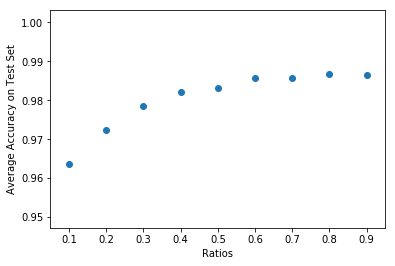

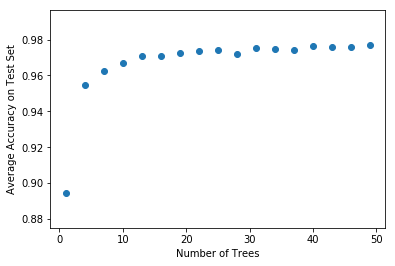

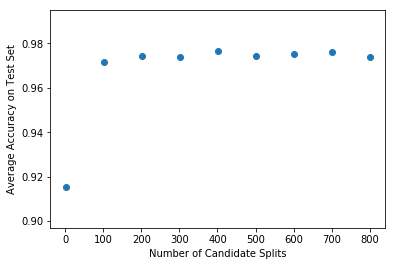

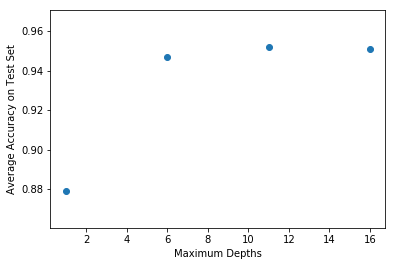

In [416]:
print('Results from 5-fold Cross Validation')
plt.scatter([x[0] for x in results_ratios2], [x[1] for x in results_ratios2])
plt.xlabel('Ratios')
plt.ylabel("Average Accuracy on Test Set")
plt.show();
plt.scatter([x[0] for x in results_numT2], [x[1] for x in results_numT2])
plt.xlabel('Number of Trees')
plt.ylabel("Average Accuracy on Test Set")
plt.show();
plt.scatter([x[0] for x in results_canSplits], [x[1] for x in results_canSplits])
plt.xlabel('Number of Candidate Splits')
plt.ylabel("Average Accuracy on Test Set")
plt.show();
plt.scatter([x[0] for x in results_depths2], [x[1] for x in results_depths2])
plt.xlabel('Maximum Depths')
plt.ylabel("Average Accuracy on Test Set")
plt.show();

In [428]:
randF = RandomForest(ratio = 0.7, N = 21, max_depth = 11, candidate_splits = 200)
randF.fit(data.X_train, data.y_train)
print('fitted')
predicted_y = np.array(randF.predict(data.X_valid))
mismatch = predicted_y != data.y_valid
acc = np.sum(mismatch)/len(predicted_y)
print(1-acc)

learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
learner
fitted
0.967631191760667


Will again choose parameters based on the plots above. Parameters will be chosen from the plateau regions (when applicable) as before. For the ratios, the slope of the accuracy gain levels out around 0.4 but does continue to grow as the ratio increases from there, so a higher ratio still below 1 is chosen. In this case, 0.5 should be sufficient. 

We see the same trend with the number of trees as we saw with the bagging classifier, where the greatest accuracy gains occur between N = 1 and N > 1. The accuracy plot levels off around N = 10 and continues to grow slowly, so will pick a value above 10, so N = 11.

For the number of candidate splits, the greatest accuracy gain is between 1 and 101, which is expected. Above 101, the accuracy is pretty constant, so will choose 200 splits, to be above the start of the plateau and to avoid unnecessary work. 

The same trend occurs for the maximum depth, where the majority of our accuracy gain occurs at the low values. Will choose a maximum depth of 11 since this is definitely in the plateau, but isn't too large such that you start to see overfitting. 

So the optimal parameters (optimal in terms of accuracy, avoiding overfitting, and minimizing computational cost) are: ratio = 0.5, number of trees = 11, maximum depth = 11, number of candidate splits = 200

The accuracy on the validation set using these parameters is roughly 96.5% (from previous run on the data, lost output)
